In [85]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-strikes.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

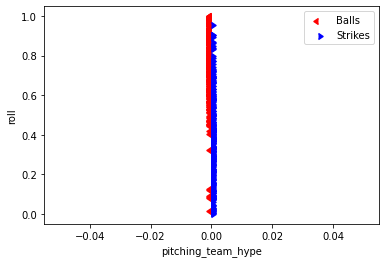

In [86]:
df['astrid_svc'] = 0.375 + 0.25 * df["pitcher_ruthlessness"] + 0.035 * df["pitcher_coldness"] - 0.2 * df["ballpark_forwardness"]
df['batter_strikeattr'] = df['batter_moxie'] * ~df['passed'] + df['batter_patheticism'] * df['passed']
df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']

df = df[(df["batting_team_hype"] == 0) & (df['pitching_team_hype'] == 0)]

x_val = "pitching_team_hype"
fig, ax = plt.subplots(1)
ax.scatter(df[~df['passed']][x_val], df[~df['passed']]["roll"], color="red", label="Balls", marker=CARETLEFTBASE)
ax.scatter(df[df['passed']][x_val], df[df['passed']]["roll"], color="blue", label="Strikes", marker=CARETRIGHTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.legend()

# endpoints = np.array(ax.get_xlim())
# ax.plot(endpoints, 0.35 + 0.35 * endpoints)

In [87]:
df.groupby('pitcher_ruthlessness').head(1)[['pitcher_ruthlessness', 'pitcher_name']].sort_values('pitcher_ruthlessness')

,pitcher_ruthlessness,pitcher_name
1701,0.400135,Axel Cardenas
2583,0.440357,Joshua Watson
2156,0.564919,Patchwork Southwick
1,0.740309,Grollis Zephyr
1807,0.864538,Inky Rutledge
1336,0.917466,Kennedy Rodgers
2611,0.954493,Cudi Di Batterino
2178,0.987573,Cravel Gesundheit
3023,1.115507,Jacoby Podcast
0,1.141035,Cory Twelve


In [88]:
df.groupby(['batter_name', 'pitcher_name']).size()

batter_name         pitcher_name       
--l-xa-dre- Walton  Joshua Watson           5
-rancisco P-eston   Snyder Briggs           3
Andrew Solis        Brock Forbes            9
                    Gloria Bugsnax          5
Baby Triumphant     Coolname Galvanic       5
                                           ..
Yusef Fenestrate    Axel Cardenas           9
                    Joshua Watson          11
                    Kennedy Rodgers        10
Zesty Yaboi         Jacoby Podcast          5
                    Patchwork Southwick     1
Length: 120, dtype: int64

In [89]:
X = df[['roll', *df.columns[5:-3]]].drop('pitcher_name', 1)
y = df['passed']

In [90]:
X

,roll,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,batter_thwackability,batter_tragicness,pitcher_ruthlessness,...,ballpark_ominousness,ballpark_inconvenience,ballpark_viscosity,ballpark_forwardness,ballpark_mysticism,ballpark_elongation,batting_team_hype,pitching_team_hype,batter_vibes,pitcher_vibes
0,0.902342,0.491996,0.959339,0.827843,0.507553,0.734665,0.715625,0.509030,0.752282,1.141035,...,0.491609,0.582938,0.400827,0.485645,0.575444,0.46963,0.0,0.0,0.005206,-0.036822
1,0.421915,1.100462,0.538089,0.445441,0.576060,0.662984,0.642349,0.456643,0.106050,0.740309,...,0.491609,0.582938,0.400827,0.485645,0.575444,0.46963,0.0,0.0,-0.189957,-0.080333
2,0.906463,1.100462,0.538089,0.445441,0.576060,0.662984,0.642349,0.456643,0.106050,0.740309,...,0.491609,0.582938,0.400827,0.485645,0.575444,0.46963,0.0,0.0,-0.189957,-0.080333
3,0.215010,1.072733,1.227810,1.366116,0.921646,0.537297,0.245965,1.035652,0.001050,0.740309,...,0.491609,0.582938,0.400827,0.485645,0.575444,0.46963,0.0,0.0,-0.400412,-0.080333
4,0.079062,0.901559,1.381520,1.257375,1.529352,1.386227,0.466502,0.910938,0.001050,0.740309,...,0.491609,0.582938,0.400827,0.485645,0.575444,0.46963,0.0,0.0,1.005275,-0.080333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,0.598074,0.865789,0.200095,0.214609,0.709758,0.979221,0.001000,0.252340,0.652839,1.256585,...,0.491609,0.582938,0.400827,0.485645,0.575444,0.46963,0.0,0.0,0.287308,0.341234
3286,0.617896,0.865789,0.200095,0.214609,0.709758,0.979221,0.001000,0.252340,0.652839,1.256585,...,0.491609,0.582938,0.400827,0.485645,0.575444,0.46963,0.0,0.0,0.287308,0.341234
3287,0.773851,0.865789,0.200095,0.214609,0.709758,0.979221,0.001000,0.252340,0.652839,1.256585,...,0.491609,0.582938,0.400827,0.485645,0.575444,0.46963,0.0,0.0,0.287308,0.341234
3289,0.198901,0.677739,0.468294,1.032871,0.891541,0.156073,0.152321,0.801351,0.181799,1.256585,...,0.491609,0.582938,0.400827,0.485645,0.575444,0.46963,0.0,0.0,0.554682,0.341234


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
trainedsvm = svm.SVC(kernel='linear').fit(X_train, y_train)
predictionsvm = trainedsvm.predict(X_test)
print(confusion_matrix(y_test,predictionsvm))
print(classification_report(y_test,predictionsvm))


[[73  2]
 [ 9 52]]
              precision    recall  f1-score   support

       False       0.89      0.97      0.93        75
        True       0.96      0.85      0.90        61

    accuracy                           0.92       136
   macro avg       0.93      0.91      0.92       136
weighted avg       0.92      0.92      0.92       136



In [93]:
import numpy as np

coef = np.true_divide(trainedsvm.coef_,  sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

In [94]:
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(-1.0836344594142662, 'defense_avg_chasiness'),
 (1.0, 'roll'),
 (-0.5851438067106041, 'ballpark_ominousness'),
 (0.4671452410423561, 'defense_avg_anticapitalism'),
 (0.3943016316038567, 'ballpark_viscosity'),
 (-0.3791875223190721, 'pitcher_ruthlessness'),
 (-0.37875371351579773, 'ballpark_inconvenience'),
 (-0.34674901820314386, 'defense_avg_omniscience'),
 (0.18456541819555045, 'ballpark_grandiosity'),
 (0.17730915522092325, 'defense_avg_tenaciousness'),
 (-0.13206073044840463, 'pitcher_unthwackability'),
 (0.12405136375825364, 'pitcher_suppression'),
 (-0.11835344391148576, 'pitcher_coldness'),
 (0.10746779223033007, 'batter_moxie'),
 (-0.10688488245023875, 'pitcher_vibes'),
 (0.0910645658271944, 'ballpark_elongation'),
 (0.08831452133215804, 'defense_avg_watchfulness'),
 (0.08097189496734895, 'batter_thwackability'),
 (-0.08049076447794218, 'ballpark_mysticism'),
 (-0.06369068732905098, 'batter_musclitude'),
 (0.05812615769311966, 'ballpark_forwardness'),
 (-0.05689458894729468, 

In [95]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept / coef[0, 0]

array([0.50828318])

In [96]:
sc.inverse_transform(trainedsvm.coef_)

array([[-0.08668201,  0.74450901,  0.83323865,  0.79898964,  0.62716354,
         0.75512204,  0.34681639,  0.68729374,  0.19815087,  1.28306392,
         0.86433319,  1.03843546,  0.72430177,  0.44698438,  0.95119008,
         0.85228992,  0.6923314 ,  0.87568536,  0.71613858,  0.64143456,
         0.66156792,  0.46887589,  0.6105607 ,  0.67578268,  0.47853857,
         0.52162508,  0.44779143,  0.47806482,  0.45669776,  0.52486325,
         0.        ,  0.        ,  0.05324931,  0.34128045]])